In [1]:
%%capture
!pip install mplhep --user

In [2]:
import numpy as np
import mplhep as hep
import ipywidgets as widget
import config, tools, plotting
import os, sys
import ROOT

Welcome to JupyROOT 6.24/06


In [93]:
filenames = [
    #"TTToSemiLepton_HT500Njet9_UL2017_1.root",
    #"TTToSemiLepton_HT500Njet9_UL2017_2.root"
    "TTToSemiLeptonic_UL2017.root"
]
lumitext = "SemiLeptonic"
year = "UL 2017"

rFiles = { filename: ROOT.TFile.Open( filename ) for filename in filenames }
rTrees = { filename: rFiles[ filename ].Get( "btagana" ).Get( "ttree" ) for filename in filenames }

savedir = "./{}_UL{}".format( lumitext, year )
if not os.path.exists( savedir ):
    os.mkdir( savedir )

In [94]:
btagger_ = widget.Dropdown( options = config.wp.keys(), value = "deepJet" )
btagger_

Dropdown(index=1, options=('deepCSV', 'deepJet'), value='deepJet')

In [5]:
wp_ = widget.Dropdown( options = config.wp[ btagger_.value ].keys(), value = "MEDIUM" )
wp_

Dropdown(index=1, options=('LOOSE', 'MEDIUM', 'TIGHT'), value='MEDIUM')

In [6]:
variable = widget.Dropdown( options = [ "nJ", "nB" ] )
variable

Dropdown(options=('nJ', 'nB'), value='nJ')

In [7]:
hist_1D = tools.get_dz_1D( 
    rTrees, config.plot_params[ variable.value ]["BINS"], variable.value,
    btagger_.value, wp_.value
)

100%|██████████| 84000/84000 [00:10<00:00, 7789.57it/s]


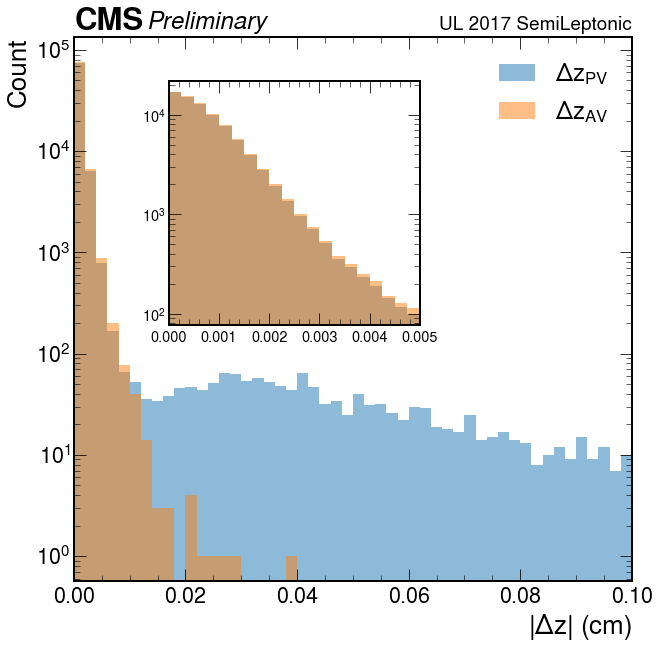

In [8]:
edges = np.linspace( 0, 0.10, 51 )
sub_edges = np.linspace( 0, 0.005, 21 )

plotting.plot_vertex_1D(
    hist_1D[ "DZ PV" ], hist_1D[ "DZ AV" ],
    edges, sub_edges,
    year, lumitext,
    "{}/{}_Vertex1D.png".format( savedir, variable.value )
)

In [9]:
dzVar = widget.Dropdown( options = [ "DZ PV BINNED", "DZ AV BINNED" ] )
dzVar

Dropdown(options=('DZ PV BINNED', 'DZ AV BINNED'), value='DZ PV BINNED')

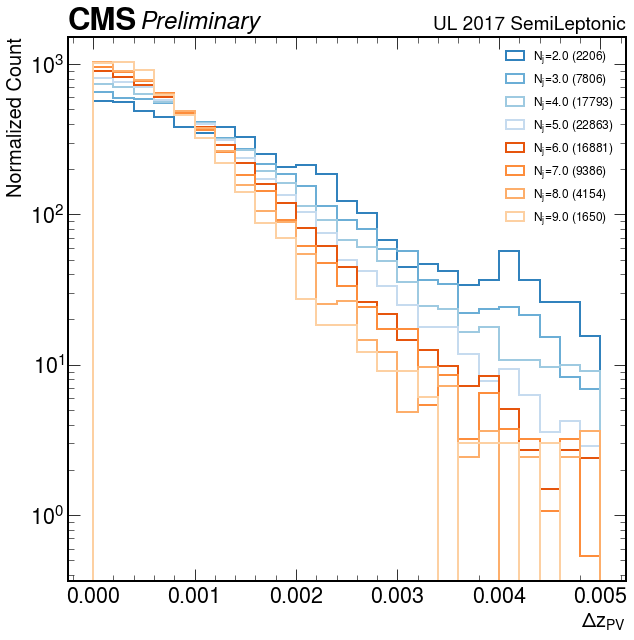

In [10]:
edges = np.linspace( 0, 0.005, 26 )

plotting.plot_binned_vertex(
    hist_1D, dzVar.value, variable.value,
    edges,
    year, lumitext, btagger_.value, wp_.value
)

In [95]:
edges = {
    "nJ": np.linspace( 0, 20, 21 ),
    "nB": np.linspace( 0, 5, 6 ),
    "dzAV": np.logspace( np.log10(1e-7), np.log10(1e1), 17 ),
    "dzPV": np.logspace( np.log10(1e-7), np.log10(1e1), 17 )
}

hist_2D, hist_dz = tools.get_dz_2D(
    rTrees, edges["nJ"], edges["nB"], btagger_.value, wp_.value
)

100%|██████████| 84000/84000 [00:41<00:00, 2018.86it/s]


In [96]:
jetVar = widget.Dropdown( options = [ "nJ", "nB" ] )
jetVar

Dropdown(options=('nJ', 'nB'), value='nJ')

In [97]:
dzVar = widget.Dropdown( options = [ "dzAV", "dzPV" ] )
dzVar

Dropdown(options=('dzAV', 'dzPV'), value='dzAV')

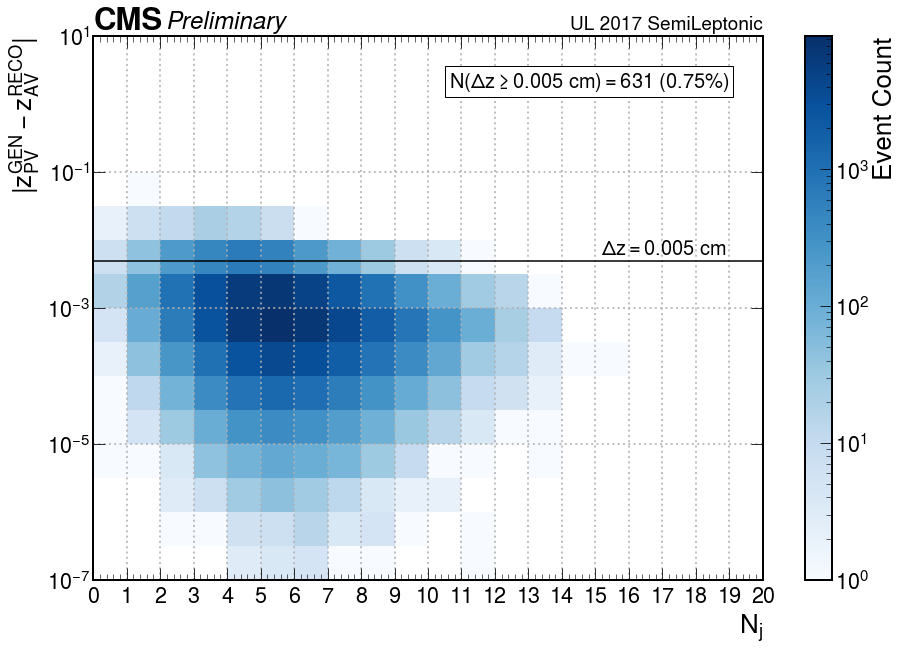

In [98]:
plotting.plot_yield_dz2D( 
    hist_2D, edges, jetVar.value, dzVar.value, 
    btagger_.value, wp_.value, year, lumitext,
    "{}/{}{}_Yield2D.png".format( savedir, jetVar.value, dzVar.value ) 
)

Plot the mean $\Delta z_{PV}$ in $N_j$ and $N_b$ space 

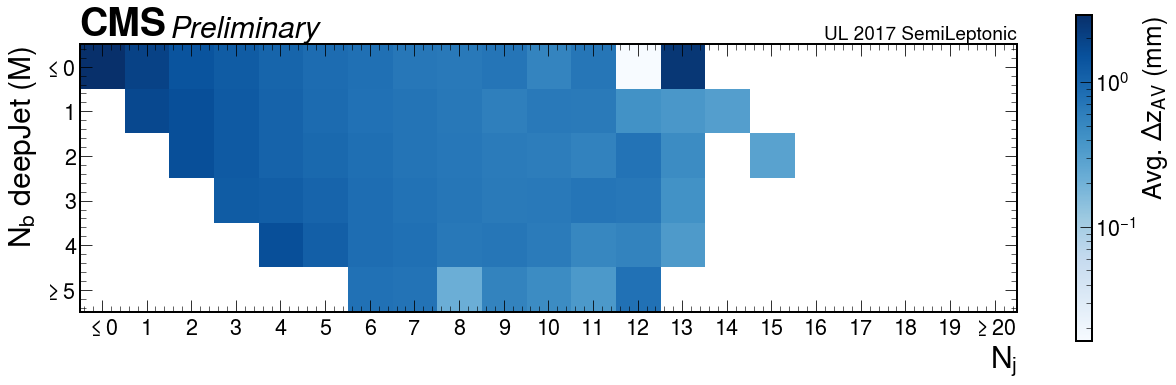

In [100]:
plotting.plot_dz2D(
    hist_dz, edges[ "nJ" ], edges[ "nB" ], dzVar.value, 
    btagger_.value, wp_.value, year, lumitext,
    "{}/{}{}_dz2D.png".format( savedir, jetVar.value, dzVar.value )
)